# Transformations for Normality

In many cases, the data we work with does not follow a normal distribution. To meet the assumptions of normality required by many statistical techniques, we can apply various transformations to our data. This notebook covers the following transformations:

1. Yeo-Johnson transformation
2. Box-Cox transformation
3. Log transformation
4. Cube root transformation


## 1. Yeo-Johnson Transformation

The Yeo-Johnson transformation is similar to the Box-Cox transformation but can be applied to data that includes zero or negative values. It is defined by a parameter, $\lambda$, that determines the transformation applied to the data.


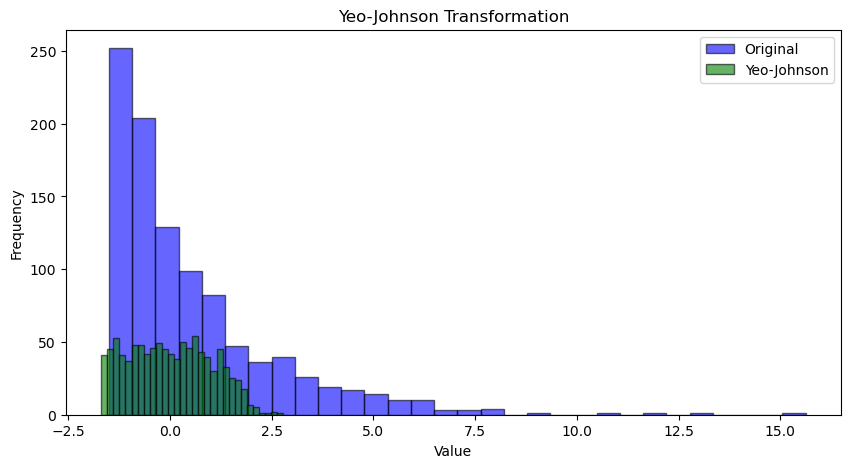

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Generate example data
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000) - 1.5  # Some negative values

df = pd.DataFrame(data, columns=['Value'])

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['Yeo_Johnson'] = pt.fit_transform(df[['Value']])

# Plot the original and transformed data
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.6, label='Original', color='blue', edgecolor='black')
plt.hist(df['Yeo_Johnson'], bins=30, alpha=0.6, label='Yeo-Johnson', color='green', edgecolor='black')
plt.title('Yeo-Johnson Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As shown in the histogram, the Yeo-Johnson transformation has made the data more symmetrical and closer to a normal distribution compared to the original data.

## 2. Box-Cox Transformation
The Box-Cox transformation is a power transformation that can be used to stabilize variance and make the data more normally distributed. It is only applicable to positive data. The transformation is defined by the parameter $\lambda$.

Optimal lambda for Box-Cox: 0.2682991586846268


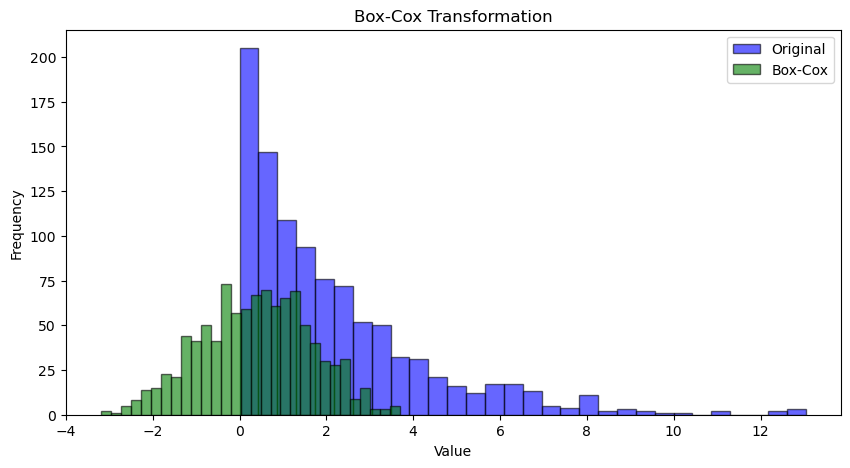

In [2]:
from scipy.stats import boxcox

# Generate example data
data = np.random.exponential(scale=2, size=1000)

df = pd.DataFrame(data, columns=['Value'])

# Apply Box-Cox transformation
df['Box_Cox'], fitted_lambda = boxcox(df['Value'])
print(f"Optimal lambda for Box-Cox: {fitted_lambda}")

# Plot the original and transformed data
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.6, label='Original', color='blue', edgecolor='black')
plt.hist(df['Box_Cox'], bins=30, alpha=0.6, label='Box-Cox', color='green', edgecolor='black')
plt.title('Box-Cox Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


As shown in the histogram, the Box-Cox transformation has made the data more symmetrical and closer to a normal distribution compared to the original data.

## 3. Log Transformation

The log transformation is a simple and effective way to normalize skewed data. It compresses the range of the data, making highly skewed distributions more symmetric.

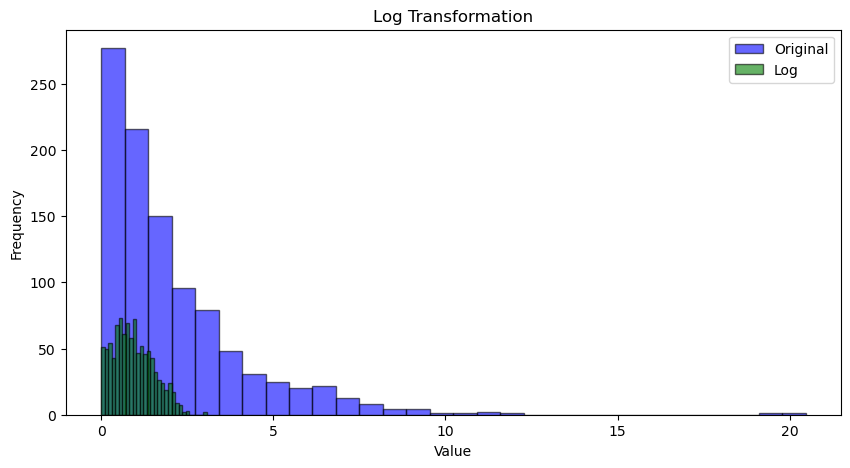

In [3]:
# Generate example data
data = np.random.exponential(scale=2, size=1000)

df = pd.DataFrame(data, columns=['Value'])

# Apply log transformation
df['Log'] = np.log(df['Value'] + 1)  # Adding 1 to avoid log(0)

# Plot the original and transformed data
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.6, label='Original', color='blue', edgecolor='black')
plt.hist(df['Log'], bins=30, alpha=0.6, label='Log', color='green', edgecolor='black')
plt.title('Log Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


As shown in the histogram, the log transformation has compressed the range of values, making the distribution more symmetric and closer to normal.

## 4. Cube Root Transformation

The cube root transformation is another method to reduce skewness in the data. It is less aggressive than the log transformation and can be applied to both positive and negative data.

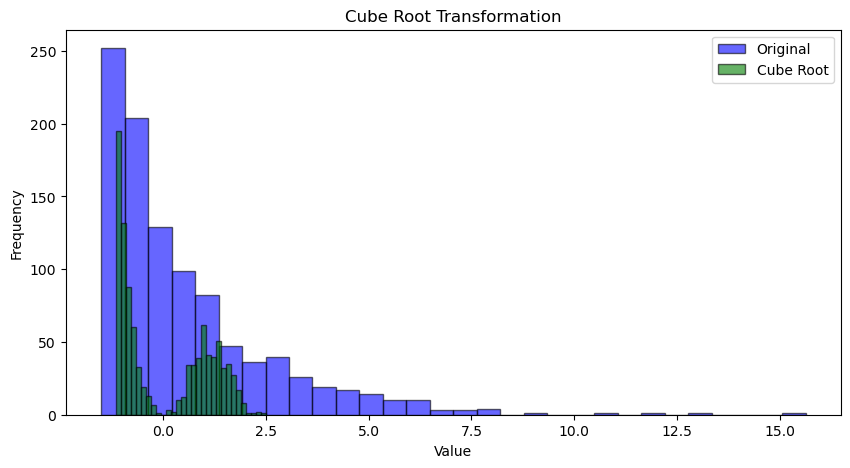

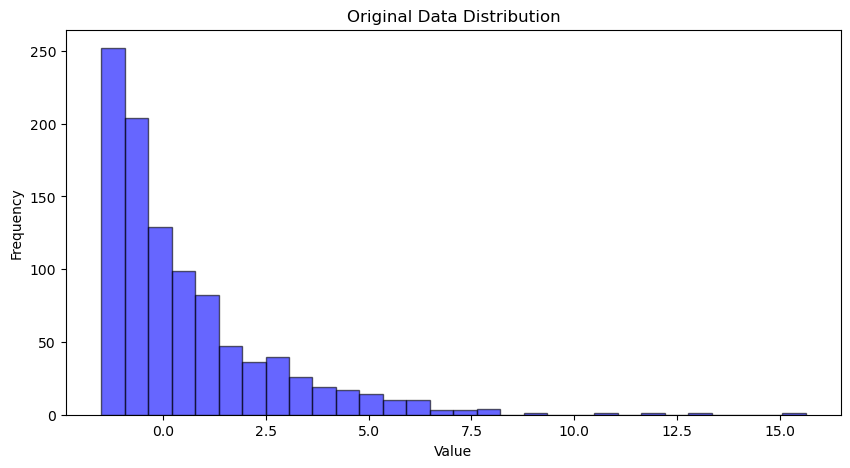

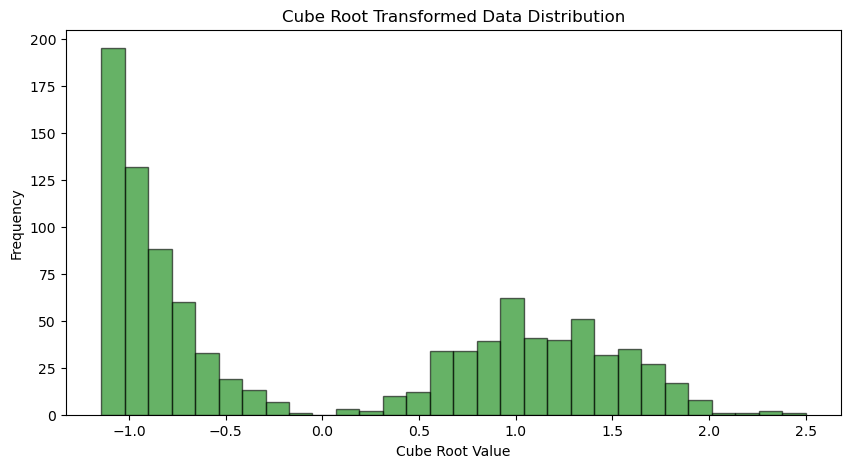

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000) - 1.5  # Some negative values

df = pd.DataFrame(data, columns=['Value'])

# Apply cube root transformation
df['Cube_Root'] = np.cbrt(df['Value'])

# Plot the original and transformed data
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.6, label='Original', color='blue', edgecolor='black')
plt.hist(df['Cube_Root'], bins=30, alpha=0.6, label='Cube Root', color='green', edgecolor='black')
plt.title('Cube Root Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Investigate the original data distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=30, alpha=0.6, color='blue', edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Investigate the cube root transformed data distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Cube_Root'], bins=30, alpha=0.6, color='green', edgecolor='black')
plt.title('Cube Root Transformed Data Distribution')
plt.xlabel('Cube Root Value')
plt.ylabel('Frequency')
plt.show()


The cube root transformation has produced a histogram that appears to have two peaks, which might seem like it has created two Gaussian distributions. This effect can occur due to the nature of the cube root transformation and the underlying data characteristics. Here are a few reasons why this might happen:

- Nature of the Cube Root Transformation: The cube root transformation is less aggressive compared to other transformations like the log transformation. It smooths the data, but it doesn't necessarily compress extreme values as much. This can lead to the appearance of multiple peaks if the original data had distinct clusters or a significant skew.

- Underlying Data Characteristics: The original data may have had subpopulations or clusters within it. When transformed, these clusters can sometimes become more apparent, resulting in multiple peaks in the histogram.

- Bimodal Distribution: The original data might inherently follow a bimodal distribution (two distinct peaks), and the transformation simply preserves this characteristic while reducing overall skewness.